###Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

###Uploading the Dataset from UCI Library

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Live_20210128.csv to Live_20210128.csv


In [3]:
dataset = pd.read_csv('/content/Live_20210128.csv')
dataset.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


###Pre-Processing of Dataset

In [4]:
dataset.shape

(7050, 16)

In [5]:
dataset.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [6]:
dataset = dataset.drop(['status_id','status_published','Column1','Column2','Column3','Column4'],axis=1)

<Axes: xlabel='status_type', ylabel='count'>

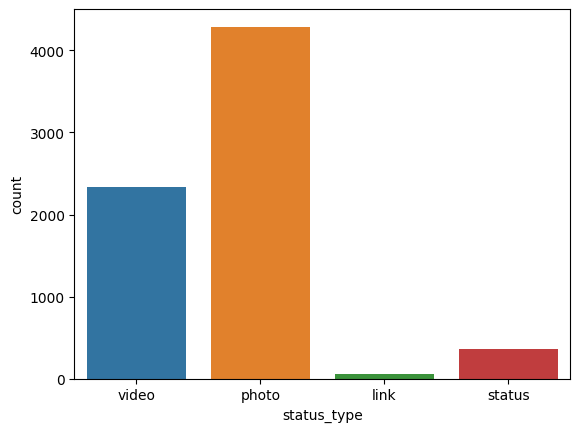

In [7]:
sns.countplot(x = 'status_type', data=dataset)

In [8]:
dataset.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [9]:
X = dataset.iloc[:,1:]

y = dataset['status_type']

In [10]:
X

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0
7047,2,0,0,1,1,0,0,0,0
7048,351,12,22,349,2,0,0,0,0


In [11]:
ss = StandardScaler()
ss.fit_transform(X)

array([[ 0.64610394,  0.32335035,  1.6868788 , ...,  0.07671305,
         0.47357035, -0.15574803],
       [-0.17319166, -0.25220622, -0.3041444 , ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.00673846,  0.01308938,  0.12901714, ...,  0.07671305,
        -0.152587  , -0.15574803],
       ...,
       [-0.49312768, -0.25220622, -0.3041444 , ..., -0.17600986,
        -0.152587  , -0.15574803],
       [ 0.26131603, -0.23871662, -0.13695924, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.46070173, -0.25220622, -0.3041444 , ..., -0.17600986,
        -0.152587  , -0.15574803]])

###Creation of 10 samples with 70-30 ratio of Training and Testing Set

In [12]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [13]:
samples

[(      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
  1231           3190            19           1       3190          0         0   
  3312             10             0           0         10          0         0   
  2696             37             0           2         35          1         1   
  5849              8             0           0          7          1         0   
  4929             20             0           0         20          0         0   
  ...             ...           ...         ...        ...        ...       ...   
  4931             34             0           0         33          0         1   
  3264            296           869          58        252         39         2   
  1653            115             9           0        115          0         0   
  2607             25             9           0         25          0         0   
  2732            174            66           1        173          1         0   
  
 

### Creation of a Fitness Function

In [14]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [15]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

### Calling the Function for Every Sample

In [16]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.56 Best Kernel =  rbf Best Nu =  1.62 Best Epsilon =  1.88
Best Accuracy =  0.62 Best Kernel =  rbf Best Nu =  3.21 Best Epsilon =  5.6
Best Accuracy =  0.62 Best Kernel =  rbf Best Nu =  1.21 Best Epsilon =  4.08
Best Accuracy =  0.42 Best Kernel =  rbf Best Nu =  6.07 Best Epsilon =  8.6
Best Accuracy =  0.43 Best Kernel =  rbf Best Nu =  2.75 Best Epsilon =  8.04
Best Accuracy =  0.54 Best Kernel =  rbf Best Nu =  7.6 Best Epsilon =  9.53
Best Accuracy =  0.49 Best Kernel =  rbf Best Nu =  1.3 Best Epsilon =  6.58
Best Accuracy =  0.71 Best Kernel =  sigmoid Best Nu =  6.61 Best Epsilon =  0.45
Best Accuracy =  0.54 Best Kernel =  rbf Best Nu =  5.01 Best Epsilon =  3.58
Best Accuracy =  0.64 Best Kernel =  sigmoid Best Nu =  0.27 Best Epsilon =  1.02


###Creation of a Result Table

In [17]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.56,rbf,1.62,1.88
1,2,0.62,rbf,3.21,5.60
2,3,0.62,rbf,1.21,4.08
3,4,0.42,rbf,6.07,8.60
4,5,0.43,rbf,2.75,8.04
5,6,0.54,rbf,7.60,9.53
6,7,0.49,rbf,1.30,6.58
7,8,0.71,sigmoid,6.61,0.45
8,9,0.54,rbf,5.01,3.58
9,10,0.64,sigmoid,0.27,1.02


### Plotting of the Convergence Graph/Linear Curve

In [18]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [19]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [20]:
train_sizes

array([  44,  134,  223,  313,  403,  493,  582,  672,  762,  851,  941,
       1031, 1121, 1210, 1300, 1390, 1480, 1569, 1659, 1749, 1838, 1928,
       2018, 2108, 2197, 2287, 2377, 2467, 2556, 2646, 2736, 2825, 2915,
       3005, 3095, 3184, 3274, 3364, 3454, 3543, 3633, 3723, 3812, 3902,
       3992, 4082, 4171, 4261, 4351, 4441])

In [21]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

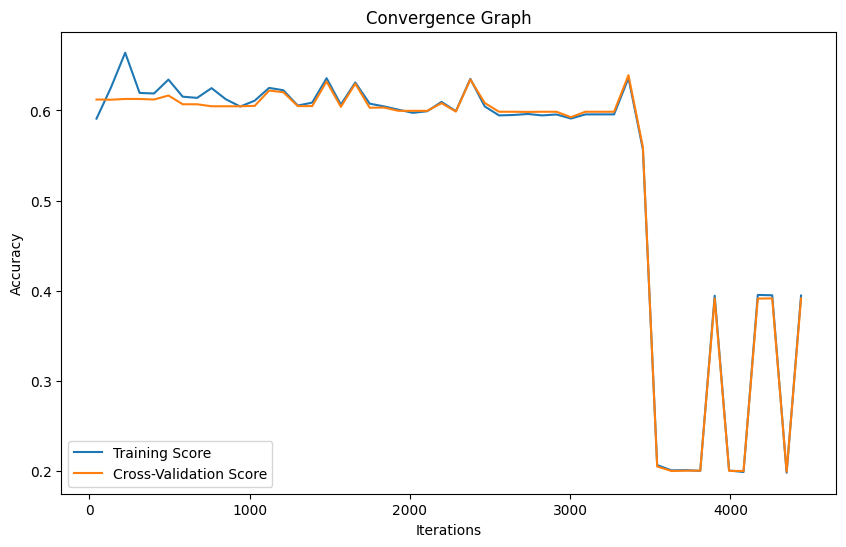

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()